In [1]:
print("PRAISE THE LORD ALMIGHTY FATHER Thank You JESUS Praise You JESUS Forever May the HOLY SPIRIT Guide Us MOTHER MARY PRAY For Us SAINT JOSEPH, PRAY For Us SAINT ANTHONY PRAY For Us GOD BLESS !!! 🧡⛪✝⛪🧡")

PRAISE THE LORD ALMIGHTY FATHER Thank You JESUS Praise You JESUS Forever May the HOLY SPIRIT Guide Us MOTHER MARY PRAY For Us SAINT JOSEPH, PRAY For Us SAINT ANTHONY PRAY For Us GOD BLESS !!! 🧡⛪✝⛪🧡


## This Notebook includes work to analyse multiple columns after pre processing data and Checking the Next Over Boundary Runs/Percentages

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [3]:
df_matches = pd.read_csv('2022_to_2023_all_matches_preprocessed_v1.csv')
## New Pre Processed Data set Read. 

## Checking Null Values

In [4]:

# Iterate over the columns
for column in df_matches.columns:
    # Count the number of null values in the column
    null_count = df_matches[column].isnull().sum()

    # Display the column name and the number of null values
    print(f"Column '{column}' has {null_count} null values.")

Column 'Unnamed: 0.1' has 0 null values.
Column 'Unnamed: 0' has 0 null values.
Column 'year' has 0 null values.
Column 'over_start_bowler_balls_bowled' has 0 null values.
Column 'over_start_bowler_wickets_taken' has 0 null values.
Column 'over_start_bowler_runs_given' has 0 null values.
Column 'over_start_batsman_on_strike_fours' has 0 null values.
Column 'over_start_batsman_on_strike_sixers' has 0 null values.
Column 'over_start_batsman_off_strike_balls_faced' has 0 null values.
Column 'over_start_batsman_on_strike_balls_faced' has 0 null values.
Column 'over_start_batsman_offstrike_runs' has 0 null values.
Column 'over_start_batsman_onstrike_runs' has 0 null values.
Column 'innings' has 0 null values.
Column 'match_num' has 0 null values.
Column 'country' has 0 null values.
Column 'target' has 0 null values.
Column 'req_run_rate' has 0 null values.
Column 'over_start_run_rate' has 0 null values.
Column 'over_start_total_score' has 0 null values.
Column 'over_start_total_wickets_fall

In [5]:
### Dataset Filtering Area
df_matches['date'] = pd.to_datetime(df_matches['date'])

countries = df_matches['country'].unique()
countries

selected_countries  = ['England', 'Pakistan', 'India','Australia','New Zealand', 'South Africa','Sri Lanka','West Indies']
df_matches = df_matches[df_matches['country'].isin(selected_countries)]

# Filter the DataFrame for values greater than a specific date
specific_date = pd.to_datetime('2017-01-01')
df_matches = df_matches[df_matches['date'] > specific_date]

In [6]:
df_matches.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'year', 'over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'match_num', 'country', 'target', 'req_run_rate',
       'over_start_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over', 'Bowler', 'batter_onStrike',
       'batter_offstrike', 'wickets_fallen', 'sixers', 'fours', 'total_runs',
       'bat_on_str_Ave', 'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50',
       'bat_on_str_0', 'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat',
       'bat_on_str_Inns', 'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS',
       'bat_on_str_BF', 'bowler_Mat', 'bowler_Inns', 'bowler_

In [7]:
df_matches = df_matches[['date','over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings','target', 'req_run_rate',
       'over_start_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over','wickets_fallen', 'sixers', 'fours', 'total_runs','bat_on_str_Ave', 'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50',
       'bat_on_str_0', 'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat',
       'bat_on_str_Inns', 'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS',
       'bat_on_str_BF', 'bowler_Mat', 'bowler_Inns', 'bowler_Overs',
       'bowler_Mdns', 'bowler_Runs', 'bowler_Wkts', 'bowler_Ave',
       'bowler_Econ', 'bowler_SR', 'bowler_4w', 'bowler_5w', 'bat_off_str_Ave',
       'bat_off_str_SR', 'bat_off_str_100','bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s', 'bat_off_str_6s',
       'bat_off_str_Mat', 'bat_off_str_Inns', 'bat_off_str_NO',
       'bat_off_str_Runs', 'bat_off_str_HS', 'bat_off_str_BF','y_is_wicket_fallen', 'match_num',]]

df_matches

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,...,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,match_num
40,2021-10-24,0,0,0,0,0,0,0,0,0,...,252.0,133.0,111.0,103.0,15.0,2864.0,118.0,2061.0,1,1361
41,2021-10-24,0,0,0,0,0,3,2,1,1,...,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,0,1361
42,2021-10-24,6,1,2,0,0,4,7,3,3,...,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,1,1361
43,2021-10-24,6,0,4,0,0,4,5,7,4,...,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,1361
44,2021-10-24,12,2,10,0,0,6,9,11,6,...,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,1361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,...,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,1,665
19106,2018-04-03,12,1,15,0,0,20,1,21,1,...,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,665
19107,2018-04-03,12,1,26,2,0,6,21,2,22,...,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,0,665
19108,2018-04-03,18,1,21,1,0,24,11,26,8,...,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,665


In [8]:
#Getting the total matches
# Get the unique values in the 'column_name' column
match_list = df_matches['match_num'].unique()

# Display the unique values
print(len(match_list))

353


In [9]:
df_matches.columns

Index(['date', 'over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'target', 'req_run_rate', 'over_start_run_rate',
       'over_start_total_score', 'over_start_total_wickets_fallen', 'over',
       'wickets_fallen', 'sixers', 'fours', 'total_runs', 'bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       '

### Add the Boundary Percentage

In [10]:


boundry_percentage_calc = lambda row: (row['fours']*4 + row['sixers']*6)/row['total_runs'] if row['total_runs']>0 else 0

df_matches['boundry_percentage'] = df_matches.apply(boundry_percentage_calc, axis=1)


In [11]:
## Select Data for Training

In [12]:
df_final = df_matches[['date','over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings','over_start_run_rate',
       'over_start_total_score','over_start_total_wickets_fallen', 'over','wickets_fallen', 'sixers', 'fours', 'total_runs','bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       'bowler_4w', 'bowler_5w', 'bat_off_str_Ave', 'bat_off_str_SR',
       'bat_off_str_100', 'bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s',
       'bat_off_str_6s', 'bat_off_str_Mat', 'bat_off_str_Inns',
       'bat_off_str_NO', 'bat_off_str_Runs', 'bat_off_str_HS',
       'bat_off_str_BF','y_is_wicket_fallen','boundry_percentage','match_num']]

In [13]:
df_final

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,...,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,boundry_percentage,match_num
40,2021-10-24,0,0,0,0,0,0,0,0,0,...,133.0,111.0,103.0,15.0,2864.0,118.0,2061.0,1,0.000000,1361
41,2021-10-24,0,0,0,0,0,3,2,1,1,...,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,0,0.000000,1361
42,2021-10-24,6,1,2,0,0,4,7,3,3,...,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,1,0.750000,1361
43,2021-10-24,6,0,4,0,0,4,5,7,4,...,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,0.571429,1361
44,2021-10-24,12,2,10,0,0,6,9,11,6,...,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,0.666667,1361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,...,2.0,2.0,2.0,0.0,104.0,63.0,78.0,1,0.571429,665
19106,2018-04-03,12,1,15,0,0,20,1,21,1,...,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,0.000000,665
19107,2018-04-03,12,1,26,2,0,6,21,2,22,...,1.0,2.0,2.0,0.0,15.0,14.0,10.0,0,0.333333,665
19108,2018-04-03,18,1,21,1,0,24,11,26,8,...,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,0.000000,665


In [14]:
df_final.columns

Index(['date', 'over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'over_start_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over', 'wickets_fallen', 'sixers',
       'fours', 'total_runs', 'bat_on_str_Ave', 'bat_on_str_SR',
       'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0', 'bat_on_str_4s',
       'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns', 'bat_on_str_NO',
       'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF', 'bowler_Mat',
       'bowler_Inns', 'bowler_Overs', 'bowler_Mdns', 'bowler_Runs',
       'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR', 'bowler_4w',
       'bowler_5w', '

In [15]:
pd.set_option('display.max_columns', None)

df_final

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,boundry_percentage,match_num
40,2021-10-24,0,0,0,0,0,0,0,0,0,1,0.000000,0,0,0,1.0,0.0,0.0,2.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,32.54,138.96,4.0,22.0,6.0,252.0,133.0,111.0,103.0,15.0,2864.0,118.0,2061.0,1,0.000000,1361
41,2021-10-24,0,0,0,0,0,3,2,1,1,1,2.000000,2,1,1,0.0,0.0,0.0,4.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,0,0.000000,1361
42,2021-10-24,6,1,2,0,0,4,7,3,3,1,3.000000,6,1,2,1.0,1.0,0.0,8.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,1,0.750000,1361
43,2021-10-24,6,0,4,0,0,4,5,7,4,1,4.666667,14,2,3,0.0,0.0,1.0,7.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,0.571429,1361
44,2021-10-24,12,2,10,0,0,6,9,11,6,1,5.250000,21,2,4,0.0,1.0,0.0,9.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,0.666667,1361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,2,8.916667,107,1,12,1.0,0.0,1.0,7.0,53.15,127.49,0.0,4.0,0.0,67.0,9.0,19.0,19.0,6.0,691.0,97.0,542.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,1,0.571429,665
19106,2018-04-03,12,1,15,0,0,20,1,21,1,2,8.769231,114,2,13,0.0,0.0,0.0,6.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,0.000000,665
19107,2018-04-03,12,1,26,2,0,6,21,2,22,2,8.571429,120,2,14,0.0,0.0,1.0,12.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,0,0.333333,665
19108,2018-04-03,18,1,21,1,0,24,11,26,8,2,8.800000,132,2,15,0.0,0.0,0.0,7.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,0.000000,665


In [16]:
df_final

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,boundry_percentage,match_num
40,2021-10-24,0,0,0,0,0,0,0,0,0,1,0.000000,0,0,0,1.0,0.0,0.0,2.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,32.54,138.96,4.0,22.0,6.0,252.0,133.0,111.0,103.0,15.0,2864.0,118.0,2061.0,1,0.000000,1361
41,2021-10-24,0,0,0,0,0,3,2,1,1,1,2.000000,2,1,1,0.0,0.0,0.0,4.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,0,0.000000,1361
42,2021-10-24,6,1,2,0,0,4,7,3,3,1,3.000000,6,1,2,1.0,1.0,0.0,8.0,39.92,142.19,2.0,12.0,4.0,138.0,63.0,49.0,45.0,6.0,1557.0,110.0,1095.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,1,0.750000,1361
43,2021-10-24,6,0,4,0,0,4,5,7,4,1,4.666667,14,2,3,0.0,0.0,1.0,7.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,52.0,51.0,184.0,3.0,1178.0,51.0,23.09,6.40,21.6,1.0,1.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,0.571429,1361
44,2021-10-24,12,2,10,0,0,6,9,11,6,1,5.250000,21,2,4,0.0,1.0,0.0,9.0,52.65,139.04,0.0,28.0,3.0,285.0,90.0,90.0,84.0,24.0,3159.0,94.0,2272.0,30.0,30.0,107.2,1.0,877.0,32.0,27.40,8.17,20.1,0.0,0.0,46.33,169.51,0.0,2.0,0.0,14.0,7.0,4.0,3.0,0.0,139.0,57.0,82.0,0,0.666667,1361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,6,0,19,5,0,19,36,20,46,2,8.916667,107,1,12,1.0,0.0,1.0,7.0,53.15,127.49,0.0,4.0,0.0,67.0,9.0,19.0,19.0,6.0,691.0,97.0,542.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,1,0.571429,665
19106,2018-04-03,12,1,15,0,0,20,1,21,1,2,8.769231,114,2,13,0.0,0.0,0.0,6.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,0.000000,665
19107,2018-04-03,12,1,26,2,0,6,21,2,22,2,8.571429,120,2,14,0.0,0.0,1.0,12.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,30.0,17.0,48.3,1.0,377.0,17.0,22.17,7.77,17.1,0.0,0.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,0,0.333333,665
19108,2018-04-03,18,1,21,1,0,24,11,26,8,2,8.800000,132,2,15,0.0,0.0,0.0,7.0,7.50,150.00,0.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,15.0,14.0,10.0,3.0,3.0,12.0,0.0,132.0,3.0,44.00,11.00,24.0,0.0,0.0,52.00,133.33,0.0,1.0,0.0,10.0,2.0,2.0,2.0,0.0,104.0,63.0,78.0,0,0.000000,665


No Need to scale the Boundary Percentage because it is already in the range of 0-1

In [17]:
cols_to_scale = ['over_start_bowler_balls_bowled', 'over_start_bowler_wickets_taken',
       'over_start_bowler_runs_given', 'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'over_start_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over','wickets_fallen', 'sixers', 'fours', 'total_runs','bat_on_str_Ave',
       'bat_on_str_SR', 'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0',
       'bat_on_str_4s', 'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns',
       'bat_on_str_NO', 'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF',
       'bowler_Mat', 'bowler_Inns', 'bowler_Overs', 'bowler_Mdns',
       'bowler_Runs', 'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR',
       'bowler_4w', 'bowler_5w', 'bat_off_str_Ave', 'bat_off_str_SR',
       'bat_off_str_100', 'bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s',
       'bat_off_str_6s', 'bat_off_str_Mat', 'bat_off_str_Inns',
       'bat_off_str_NO', 'bat_off_str_Runs', 'bat_off_str_HS',
       'bat_off_str_BF',]


In [18]:
train_test_Date = pd.to_datetime('2022-01-01')
filtered_df = df_final[df_final['date'] > train_test_Date]
filtered_df

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,boundry_percentage,match_num
798,2022-01-29,0,0,0,0,0,0,0,0,0,1,0.000000,0,0,0,0.0,0.0,1.0,7.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,0,0.571429,1456
799,2022-01-29,0,0,0,0,0,2,4,4,3,1,7.000000,7,0,1,1.0,0.0,0.0,1.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,1,0.000000,1456
800,2022-01-29,6,0,7,0,0,0,8,0,4,1,4.000000,8,1,2,0.0,0.0,1.0,5.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,0,0.800000,1456
801,2022-01-29,6,1,1,1,0,2,12,0,9,1,4.333333,13,1,3,0.0,0.0,0.0,2.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,0,0.000000,1456
802,2022-01-29,12,0,12,0,0,18,2,11,0,1,3.750000,15,1,4,0.0,1.0,2.0,17.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,0,0.823529,1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,2023-01-07,9,0,15,0,0,7,3,5,4,2,8.416667,101,5,12,1.0,0.0,1.0,6.0,20.54,113.34,0.0,3.0,2.0,54.0,10.0,35.0,34.0,3.0,637.0,66.0,562.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,1,0.666667,1986
5913,2023-01-07,13,2,15,0,0,0,8,0,6,2,8.230769,107,6,13,0.0,2.0,0.0,15.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,73.0,72.0,271.0,1.0,2212.0,88.0,25.13,8.16,18.4,2.0,1.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,0,0.800000,1986
5914,2023-01-07,20,1,27,0,2,0,14,0,21,2,8.714286,122,6,14,1.0,0.0,0.0,3.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,83.0,72.0,208.5,1.0,1720.0,62.0,27.74,8.23,20.2,2.0,0.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,1,0.000000,1986
5915,2023-01-07,15,1,21,0,2,3,15,2,22,2,8.333333,125,7,15,1.0,0.0,2.0,10.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,4.57,86.48,0.0,0.0,3.0,1.0,2.0,34.0,13.0,6.0,32.0,11.0,37.0,1,0.800000,1986


In [19]:
from sklearn.model_selection import train_test_split
X_train = df_final[df_final['date'] <= train_test_Date]


In [20]:
test_Date = pd.to_datetime('2022-01-01')
X_test  =  df_final[df_final['date'] > test_Date]
X_test

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,boundry_percentage,match_num
798,2022-01-29,0,0,0,0,0,0,0,0,0,1,0.000000,0,0,0,0.0,0.0,1.0,7.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,0,0.571429,1456
799,2022-01-29,0,0,0,0,0,2,4,4,3,1,7.000000,7,0,1,1.0,0.0,0.0,1.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,25.58,149.75,0.0,2.0,0.0,26.0,16.0,12.0,12.0,0.0,307.0,73.0,205.0,1,0.000000,1456
800,2022-01-29,6,0,7,0,0,0,8,0,4,1,4.000000,8,1,2,0.0,0.0,1.0,5.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,0,0.800000,1456
801,2022-01-29,6,1,1,1,0,2,12,0,9,1,4.333333,13,1,3,0.0,0.0,0.0,2.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,33.0,30.0,108.5,1.0,863.0,30.0,28.76,7.92,21.7,2.0,0.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,0,0.000000,1456
802,2022-01-29,12,0,12,0,0,18,2,11,0,1,3.750000,15,1,4,0.0,1.0,2.0,17.0,24.93,124.66,0.0,1.0,0.0,38.0,11.0,15.0,15.0,0.0,374.0,59.0,300.0,37.0,36.0,128.1,3.0,1001.0,46.0,21.76,7.81,16.7,1.0,0.0,25.20,144.22,0.0,7.0,6.0,142.0,64.0,56.0,56.0,1.0,1386.0,78.0,961.0,0,0.823529,1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,2023-01-07,9,0,15,0,0,7,3,5,4,2,8.416667,101,5,12,1.0,0.0,1.0,6.0,20.54,113.34,0.0,3.0,2.0,54.0,10.0,35.0,34.0,3.0,637.0,66.0,562.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,1,0.666667,1986
5913,2023-01-07,13,2,15,0,0,0,8,0,6,2,8.230769,107,6,13,0.0,2.0,0.0,15.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,73.0,72.0,271.0,1.0,2212.0,88.0,25.13,8.16,18.4,2.0,1.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,0,0.800000,1986
5914,2023-01-07,20,1,27,0,2,0,14,0,21,2,8.714286,122,6,14,1.0,0.0,0.0,3.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,83.0,72.0,208.5,1.0,1720.0,62.0,27.74,8.23,20.2,2.0,0.0,17.11,106.98,0.0,0.0,5.0,15.0,12.0,40.0,33.0,16.0,291.0,31.0,272.0,1,0.000000,1986
5915,2023-01-07,15,1,21,0,2,3,15,2,22,2,8.333333,125,7,15,1.0,0.0,2.0,10.0,21.39,121.62,0.0,5.0,10.0,93.0,66.0,84.0,79.0,18.0,1305.0,74.0,1073.0,5.0,5.0,17.0,0.0,187.0,7.0,26.71,11.00,14.5,0.0,0.0,4.57,86.48,0.0,0.0,3.0,1.0,2.0,34.0,13.0,6.0,32.0,11.0,37.0,1,0.800000,1986


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])


C:\Users\Arul\AppData\Local\Temp\ipykernel_27720\4151951648.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])


In [22]:
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

C:\Users\Arul\AppData\Local\Temp\ipykernel_27720\2855813504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])


In [23]:
X_train['match_num']

40       1361
41       1361
42       1361
43       1361
44       1361
         ... 
19105     665
19106     665
19107     665
19108     665
19109     665
Name: match_num, Length: 8744, dtype: int64

In [24]:
match_list

array([1361, 1374, 1381, 1377, 1390, 1392, 1391, 1398, 1400, 1402, 1415,
       1420, 1428, 1434, 1440, 1443,  654, 1110, 1448, 1450, 1456, 1457,
       1174, 1179, 1208, 1366, 1454, 1379, 1375, 1216, 1176, 1455, 1384,
       1439, 1191, 1265, 1260, 1193, 1453, 1378, 1367, 1188, 1185, 1195,
       1178, 1369, 1192, 1382, 1218, 1189, 1168, 1273, 1447, 1354, 1222,
       1446, 1458, 1449, 1351, 1357, 1467, 1466, 1470, 1473, 1492, 1478,
       1479, 1493, 1494, 1504, 1551, 1552, 1554, 1564, 1569, 1571, 1572,
       1607,  846, 1631, 1617, 1616, 1628, 1702, 1716, 1698, 1693, 1720,
       1718, 1725, 1726, 1728, 1732, 1735, 1750, 1748, 1755, 1757, 1758,
       1761, 1759, 1769, 1764, 1760, 1789, 1788, 1795, 1794, 1798, 1793,
       1796, 1803, 1801, 1804, 1802, 1800, 1806, 1805, 1818, 1817, 1808,
       1807, 1816, 1812, 1819, 1815, 1811, 1809, 1850, 1845, 1840, 1842,
       1839, 1847, 1858, 1853, 1856, 1860, 1861, 1864, 1872, 1867, 1877,
       1878, 1879, 1898, 1984, 1985, 1986,  625, 10

In [25]:
X_train.columns

Index(['date', 'over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'over_start_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over', 'wickets_fallen', 'sixers',
       'fours', 'total_runs', 'bat_on_str_Ave', 'bat_on_str_SR',
       'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0', 'bat_on_str_4s',
       'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns', 'bat_on_str_NO',
       'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF', 'bowler_Mat',
       'bowler_Inns', 'bowler_Overs', 'bowler_Mdns', 'bowler_Runs',
       'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR', 'bowler_4w',
       'bowler_5w', '

In [26]:
pd.set_option('display.max_columns', None)

X_train

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,boundry_percentage,match_num
40,2021-10-24,-1.187730,-0.546822,-1.010363,-0.760960,-0.508193,-1.042405,-1.104070,-0.882083,-0.932306,1,-2.680196,-1.461640,-1.127232,-1.613675,1.234724,-0.523689,-0.821755,-1.345993,1.055349,0.637142,2.107231,1.276990,1.158787,0.918479,1.031962,0.448251,0.459606,0.038770,0.991830,1.164348,0.867489,0.258333,0.393751,0.461307,0.164059,0.582360,0.310506,0.087789,0.310775,-0.008909,-0.603526,-0.375025,0.474172,0.482550,4.798792,3.281327,2.272324,2.679818,3.401666,2.798586,2.794314,1.576551,2.885605,1.370461,2.763408,1,0.000000,1361
41,2021-10-24,-1.187730,-0.546822,-1.010363,-0.760960,-0.508193,-0.790144,-0.939796,-0.825788,-0.876383,1,-1.940652,-1.420529,-0.648993,-1.436072,-0.580412,-0.523689,-0.821755,-0.911883,2.125473,0.486336,-0.448518,4.150599,0.620424,3.027347,1.901853,1.958249,1.984506,3.024976,3.152785,0.677823,3.015473,1.352531,1.550980,1.662465,1.954668,1.202824,1.191664,-0.287906,-1.173256,0.188078,0.800810,2.434748,1.081198,0.631172,2.175162,1.402843,1.185751,1.003855,1.093142,0.490983,0.506569,0.065090,1.076068,1.139003,0.952476,0,0.000000,1361
42,2021-10-24,-0.299548,1.017777,-0.800741,-0.760960,-0.508193,-0.706057,-0.529110,-0.713198,-0.764536,1,-1.570881,-1.338306,-0.648993,-1.258470,1.234724,1.112885,-0.821755,-0.043664,1.055349,0.637142,2.107231,1.276990,1.158787,0.918479,1.031962,0.448251,0.459606,0.038770,0.991830,1.164348,0.867489,0.258333,0.393751,0.461307,0.164059,0.582360,0.310506,0.087789,0.310775,-0.008909,-0.603526,-0.375025,2.128276,0.486231,-0.448468,4.408418,0.642465,3.164966,1.983572,2.016979,2.044880,3.088012,3.294032,0.676088,3.158964,1,0.750000,1361
43,2021-10-24,-0.299548,-0.546822,-0.591120,-0.760960,-0.508193,-0.706057,-0.693384,-0.488018,-0.708612,1,-0.954594,-1.173859,-0.170753,-1.080868,-0.580412,-0.523689,0.444846,-0.260719,2.125473,0.486336,-0.448518,4.150599,0.620424,3.027347,1.901853,1.958249,1.984506,3.024976,3.152785,0.677823,3.015473,1.352531,1.550980,1.662465,1.954668,1.202824,1.191664,-0.287906,-1.173256,0.188078,0.800810,2.434748,1.608438,1.888246,-0.448468,-0.475641,-0.987394,-0.819123,-0.753678,-1.183890,-1.150074,-0.942551,-0.887147,-0.394405,-0.946565,0,0.571429,1361
44,2021-10-24,0.588634,2.582376,0.037746,-0.760960,-0.508193,-0.537882,-0.364836,-0.262837,-0.596765,1,-0.738894,-1.029969,-0.170753,-0.903265,-0.580412,1.112885,-0.821755,0.173391,2.125473,0.486336,-0.448518,4.150599,0.620424,3.027347,1.901853,1.958249,1.984506,3.024976,3.152785,0.677823,3.015473,0.258333,0.393751,0.461307,0.164059,0.582360,0.310506,0.087789,0.310775,-0.008909,-0.603526,-0.375025,1.608438,1.888246,-0.448468,-0.475641,-0.987394,-0.819123,-0.753678,-1.183890,-1.150074,-0.942551,-0.887147,-0.394405,-0.946565,0,0.666667,1361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,-0.299548,-0.546822,0.981044,1.

### This Model Analyses the Total Runs in Next Over


In [27]:
match_list = X_train['match_num'].unique()
match_list

array([1361, 1374, 1381, 1377, 1390, 1392, 1391, 1398, 1400, 1402, 1415,
       1420, 1428, 1434, 1440, 1443,  654, 1110, 1448, 1450, 1174, 1179,
       1208, 1366, 1379, 1375, 1216, 1176, 1384, 1439, 1191, 1265, 1260,
       1193, 1378, 1367, 1188, 1185, 1195, 1178, 1369, 1192, 1382, 1218,
       1189, 1168, 1273, 1447, 1354, 1222, 1446, 1449, 1351, 1357,  846,
        625, 1009, 1148, 1206, 1258,  605, 1243,  749,  686, 1031, 1119,
        690,  650,  763, 1146,  664, 1129,  659, 1000, 1032, 1116,  653,
        649,  617, 1075,  716, 1039,  615, 1118, 1002,  705,  714, 1115,
        993,  627,  693,  880,  647, 1113,  589, 1190, 1251, 1033, 1008,
       1126, 1128, 1078,  712,  613,  661,  657,  639,  922, 1207, 1139,
        703, 1014,  702, 1114, 1140, 1096,  591,  655,  598,  593, 1131,
        622, 1121,  718,  618,  692, 1141,  684,  842,  735, 1020,  658,
        706,  689,  595,  688, 1111, 1046, 1212,  630,  632, 1263, 1109,
        893, 1165,  645,  711, 1123,  594,  646,  7

In [28]:
X_train.columns

Index(['date', 'over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'over_start_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over', 'wickets_fallen', 'sixers',
       'fours', 'total_runs', 'bat_on_str_Ave', 'bat_on_str_SR',
       'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0', 'bat_on_str_4s',
       'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns', 'bat_on_str_NO',
       'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF', 'bowler_Mat',
       'bowler_Inns', 'bowler_Overs', 'bowler_Mdns', 'bowler_Runs',
       'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR', 'bowler_4w',
       'bowler_5w', '

In [29]:
X_train_rnn = []
y_train_rnn = []

#Tracking down 5 previous overs

for match in match_list:
    print("In new Match" , match)
    for i in range(1,3):
        print("In new Innings" , i)
        innings_df = X_train[(X_train['match_num'] == match) & (X_train['innings'] == i)]
        print(len(innings_df))
        
        for over in range(5,len(innings_df)):
            
            X_train_rnn.append(innings_df.reset_index(drop=True).loc[over-5:over-1, 'over_start_bowler_balls_bowled':'boundry_percentage'])
            y_train_rnn.append(innings_df.reset_index(drop=True).loc[over, 'boundry_percentage'])

        

In new Match 1361
In new Innings 1
20
In new Innings 2
18
In new Match 1374
In new Innings 1
20
In new Innings 2
17
In new Match 1381
In new Innings 1
20
In new Innings 2
15
In new Match 1377
In new Innings 1
0
In new Innings 2
19
In new Match 1390
In new Innings 1
20
In new Innings 2
0
In new Match 1392
In new Innings 1
20
In new Innings 2
20
In new Match 1391
In new Innings 1
0
In new Innings 2
7
In new Match 1398
In new Innings 1
20
In new Innings 2
17
In new Match 1400
In new Innings 1
20
In new Innings 2
20
In new Match 1402
In new Innings 1
0
In new Innings 2
19
In new Match 1415
In new Innings 1
20
In new Innings 2
19
In new Match 1420
In new Innings 1
20
In new Innings 2
19
In new Match 1428
In new Innings 1
20
In new Innings 2
19
In new Match 1434
In new Innings 1
20
In new Innings 2
20
In new Match 1440
In new Innings 1
20
In new Innings 2
18
In new Match 1443
In new Innings 1
0
In new Innings 2
19
In new Match 654
In new Innings 1
20
In new Innings 2
19
In new Match 1110
In 

In [30]:
X_train_rnn[0]

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,boundry_percentage
0,-1.187730,-0.546822,-1.010363,-0.76096,-0.508193,-1.042405,-1.104070,-0.882083,-0.932306,1,-2.680196,-1.461640,-1.127232,-1.613675,1.234724,-0.523689,-0.821755,-1.345993,1.055349,0.637142,2.107231,1.276990,1.158787,0.918479,1.031962,0.448251,0.459606,0.038770,0.991830,1.164348,0.867489,0.258333,0.393751,0.461307,0.164059,0.582360,0.310506,0.087789,0.310775,-0.008909,-0.603526,-0.375025,0.474172,0.482550,4.798792,3.281327,2.272324,2.679818,3.401666,2.798586,2.794314,1.576551,2.885605,1.370461,2.763408,1,0.000000
1,-1.187730,-0.546822,-1.010363,-0.76096,-0.508193,-0.790144,-0.939796,-0.825788,-0.876383,1,-1.940652,-1.420529,-0.648993,-1.436072,-0.580412,-0.523689,-0.821755,-0.911883,2.125473,0.486336,-0.448518,4.150599,0.620424,3.027347,1.901853,1.958249,1.984506,3.024976,3.152785,0.677823,3.015473,1.352531,1.550980,1.662465,1.954668,1.202824,1.191664,-0.287906,-1.173256,0.188078,0.800810,2.434748,1.081198,0.631172,2.175162,1.402843,1.185751,1.003855,1.093142,0.490983,0.506569,0.065090,1.076068,1.139003,0.952476,0,0.000000
2,-0.299548,1.017777,-0.800741,-0.76096,-0.508193,-0.706057,-0.529110,-0.713198,-0.764536,1,-1.570881,-1.338306,-0.648993,-1.258470,1.234724,1.112885,-0.821755,-0.043664,1.055349,0.637142,2.107231,1.276990,1.158787,0.918479,1.031962,0.448251,0.459606,0.038770,0.991830,1.164348,0.867489,0.258333,0.393751,0.461307,0.164059,0.582360,0.310506,0.087789,0.310775,-0.008909,-0.603526,-0.375025,2.128276,0.486231,-0.448468,4.408418,0.642465,3.164966,1.983572,2.016979,2.044880,3.088012,3.294032,0.676088,3.158964,1,0.750000
3,-0.299548,-0.546822,-0.591120,-0.76096,-0.508193,-0.706057,-0.693384,-0.488018,-0.708612,1,-0.954594,-1.173859,-0.170753,-1.080868,-0.580412,-0.523689,0.444846,-0.260719,2.125473,0.486336,-0.448518,4.150599,0.620424,3.027347,1.901853,1.958249,1.984506,3.024976,3.152785,0.677823,3.015473,1.352531,1.550980,1.662465,1.954668,1.202824,1.191664,-0.287906,-1.173256,0.188078,0.800810,2.434748,1.608438,1.888246,-0.448468,-0.475641,-0.987394,-0.819123,-0.753678,-1.183890,-1.150074,-0.942551,-0.887147,-0.394405,-0.946565,0,0.571429
4,0.588634,2.582376,0.037746,-0.76096,-0.508193,-0.537882,-0.364836,-0.262837,-0.596765,1,-0.738894,-1.029969,-0.170753,-0.903265,-0.580412,1.112885,-0.821755,0.173391,2.125473,0.486336,-0.448518,4.150599,0.620424,3.027347,1.901853,1.958249,1.984506,3.024976,3.152785,0.677823,3.015473,0.258333,0.393751,0.461307,0.164059,0.582360,0.310506,0.087789,0.310775,-0.008909,-0.603526,-0.375025,1.608438,1.888246,-0.448468,-0.475641,-0.987394,-0.819123,-0.753678,-1.183890,-1.150074,-0.942551,-0.887147,-0.394405,-0.946565,0,0.666667


In [31]:
X_train_rnn , y_train_rnn = np.array(X_train_rnn).astype('float32') , np.array(y_train_rnn).astype('float32')

In [32]:
X_train_rnn.shape

(6429, 5, 57)

In [33]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.callbacks import EarlyStopping, History, TerminateOnNaN

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train_rnn.shape[1], X_train_rnn.shape[2])))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [34]:
X_test_rnn

NameError: name 'X_test_rnn' is not defined

In [ ]:
# Fitting the RNN to the Training set
regressor.fit(X_train_rnn, y_train_rnn, epochs = 25, batch_size = 32 )


In [ ]:
X_test

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,boundry_percentage,match_num
798,2022-01-29,-1.187730,-0.546822,-1.010363,-0.760960,-0.508193,-1.042405,-1.104070,-0.882083,-0.932306,1,-2.680196,-1.461640,-1.127232,-1.613675,-0.580412,-0.523689,0.444846,-0.260719,-0.182061,0.734328,-0.448518,0.378987,2.235512,0.975864,1.064180,0.706056,0.889706,-0.790731,0.761167,0.191298,0.622943,0.606487,0.724388,0.788184,1.954668,0.837966,0.959780,-0.403840,0.008938,-0.455413,0.800810,-0.375025,-0.098308,0.979030,-0.448468,-0.475641,-0.987394,-0.642706,-0.456868,-0.886135,-0.795079,-0.942551,-0.654552,0.068511,-0.715981,0,0.571429,1456
799,2022-01-29,-1.187730,-0.546822,-1.010363,-0.760960,-0.508193,-0.874231,-0.775521,-0.656903,-0.764536,1,-0.091794,-1.317750,-1.127232,-1.436072,1.234724,-0.523689,-0.821755,-1.563048,-0.182061,0.734328,-0.448518,0.378987,2.235512,0.975864,1.064180,0.706056,0.889706,-0.790731,0.761167,0.191298,0.622943,0.407542,0.393751,0.481639,0.164059,0.553501,0.217753,0.206338,0.101166,0.201211,2.205146,-0.375025,-0.098308,0.979030,-0.448468,-0.475641,-0.987394,-0.642706,-0.456868,-0.886135,-0.795079,-0.942551,-0.654552,0.068511,-0.715981,1,0.000000,1456
800,2022-01-29,-0.299548,-0.546822,-0.276687,-0.760960,-0.508193,-1.042405,-0.446973,-0.882083,-0.708612,1,-1.201109,-1.297194,-0.648993,-1.258470,-0.580412,-0.523689,0.444846,-0.694829,-0.182061,0.734328,-0.448518,0.378987,2.235512,0.975864,1.064180,0.706056,0.889706,-0.790731,0.761167,0.191298,0.622943,0.606487,0.724388,0.788184,1.954668,0.837966,0.959780,-0.403840,0.008938,-0.455413,0.800810,-0.375025,-0.151773,-0.175436,-0.448468,-0.663490,-0.987394,-0.466289,-0.621762,-0.774477,-0.676748,-0.942551,-0.561791,-0.336540,-0.537887,0,0.800000,1456
801,2022-01-29,-0.299548,1.017777,-0.905552,-0.246395,-0.508193,-0.874231,-0.118424,-0.882083,-0.428995,1,-1.077852,-1.194415,-0.648993,-1.080868,-0.580412,-0.523689,-0.821755,-1.345993,-0.182061,0.734328,-0.448518,0.378987,2.235512,0.975864,1.064180,0.706056,0.889706,-0.790731,0.761167,0.191298,0.622943,0.407542,0.393751,0.481639,0.164059,0.553501,0.217753,0.206338,0.101166,0.201211,2.205146,-0.375025,-0.151773,-0.175436,-0.448468,-0.663490,-0.987394,-0.466289,-0.621762,-0.774477,-0.676748,-0.942551,-0.561791,-0.336540,-0.537887,0,0.000000,1456
802,2022-01-29,0.588634,-0.546822,0.247368,-0.760960,-0.508193,0.471163,-0.939796,-0.262837,-0.932306,1,-1.293552,-1.153304,-0.648993,-0.903265,-0.580412,1.112885,1.711447,1.909829,-0.204758,-0.202103,-0.448518,-0.698616,-0.994664,-0.516125,-0.643384,-0.803942,-0.713393,-0.956632,-0.603931,-0.386451,-0.583359,0.606487,0.724388,0.788184,1.954668,0.837966,0.959780,-0.403840,0.008938,-0.455413,0.800810,-0.375025,-0.129564,0.724578,-0.448468,0.463601,2.272324,1.062661,1.126120,0.751519,0.940451,-0.774611,0.839320,0.213172,0.701271,0,0.823529,1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
## Testing Mechanism 
test_match_list = X_test['match_num'].unique()
test_match_list

array([1456, 1457, 1454, 1455, 1453, 1458, 1467, 1466, 1470, 1473, 1492,
       1478, 1479, 1493, 1494, 1504, 1551, 1552, 1554, 1564, 1569, 1571,
       1572, 1607, 1631, 1617, 1616, 1628, 1702, 1716, 1698, 1693, 1720,
       1718, 1725, 1726, 1728, 1732, 1735, 1750, 1748, 1755, 1757, 1758,
       1761, 1759, 1769, 1764, 1760, 1789, 1788, 1795, 1794, 1798, 1793,
       1796, 1803, 1801, 1804, 1802, 1800, 1806, 1805, 1818, 1817, 1808,
       1807, 1816, 1812, 1819, 1815, 1811, 1809, 1850, 1845, 1840, 1842,
       1839, 1847, 1858, 1853, 1856, 1860, 1861, 1864, 1872, 1867, 1877,
       1878, 1879, 1898, 1984, 1985, 1986], dtype=int64)

In [ ]:
X_test_rnn = []
y_test_rnn = []

#Tracking down 5 previous overs

for match in test_match_list:
    print("In new Match" , match)
    for i in range(1,3):
        print("In new Innings" , i)
        innings_df = X_test[(X_test['match_num'] == match) & (X_test['innings'] == i)]
        print(len(innings_df))
        
        for over in range(5,len(innings_df)):
            
            X_test_rnn.append(innings_df.reset_index(drop=True).loc[over-5:over-1, 'over_start_bowler_balls_bowled':'boundry_percentage'])
            y_test_rnn.append(innings_df.reset_index(drop=True).loc[over, 'boundry_percentage'])


In new Match 1456
In new Innings 1
20
In new Innings 2
20
In new Match 1457
In new Innings 1
20
In new Innings 2
20
In new Match 1454
In new Innings 1
20
In new Innings 2
20
In new Match 1455
In new Innings 1
20
In new Innings 2
20
In new Match 1453
In new Innings 1
20
In new Innings 2
18
In new Match 1458
In new Innings 1
20
In new Innings 2
19
In new Match 1467
In new Innings 1
20
In new Innings 2
19
In new Match 1466
In new Innings 1
20
In new Innings 2
17
In new Match 1470
In new Innings 1
20
In new Innings 2
19
In new Match 1473
In new Innings 1
20
In new Innings 2
20
In new Match 1492
In new Innings 1
20
In new Innings 2
20
In new Match 1478
In new Innings 1
20
In new Innings 2
20
In new Match 1479
In new Innings 1
20
In new Innings 2
20
In new Match 1493
In new Innings 1
20
In new Innings 2
18
In new Match 1494
In new Innings 1
20
In new Innings 2
17
In new Match 1504
In new Innings 1
20
In new Innings 2
20
In new Match 1551
In new Innings 1
20
In new Innings 2
14
In new Match 1

In [ ]:
X_test_rnn[2]

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,boundry_percentage
2,-0.299548,-0.546822,-0.276687,-0.760960,-0.508193,-1.042405,-0.446973,-0.882083,-0.708612,1,-1.201109,-1.297194,-0.648993,-1.258470,-0.580412,-0.523689,0.444846,-0.694829,-0.182061,0.734328,-0.448518,0.378987,2.235512,0.975864,1.064180,0.706056,0.889706,-0.790731,0.761167,0.191298,0.622943,0.606487,0.724388,0.788184,1.954668,0.837966,0.959780,-0.403840,0.008938,-0.455413,0.800810,-0.375025,-0.151773,-0.175436,-0.448468,-0.663490,-0.987394,-0.466289,-0.621762,-0.774477,-0.676748,-0.942551,-0.561791,-0.336540,-0.537887,0,0.800000
3,-0.299548,1.017777,-0.905552,-0.246395,-0.508193,-0.874231,-0.118424,-0.882083,-0.428995,1,-1.077852,-1.194415,-0.648993,-1.080868,-0.580412,-0.523689,-0.821755,-1.345993,-0.182061,0.734328,-0.448518,0.378987,2.235512,0.975864,1.064180,0.706056,0.889706,-0.790731,0.761167,0.191298,0.622943,0.407542,0.393751,0.481639,0.164059,0.553501,0.217753,0.206338,0.101166,0.201211,2.205146,-0.375025,-0.151773,-0.175436,-0.448468,-0.663490,-0.987394,-0.466289,-0.621762,-0.774477,-0.676748,-0.942551,-0.561791,-0.336540,-0.537887,0,0.000000
4,0.588634,-0.546822,0.247368,-0.760960,-0.508193,0.471163,-0.939796,-0.262837,-0.932306,1,-1.293552,-1.153304,-0.648993,-0.903265,-0.580412,1.112885,1.711447,1.909829,-0.204758,-0.202103,-0.448518,-0.698616,-0.994664,-0.516125,-0.643384,-0.803942,-0.713393,-0.956632,-0.603931,-0.386451,-0.583359,0.606487,0.724388,0.788184,1.954668,0.837966,0.959780,-0.403840,0.008938,-0.455413,0.800810,-0.375025,-0.129564,0.724578,-0.448468,0.463601,2.272324,1.062661,1.126120,0.751519,0.940451,-0.774611,0.839320,0.213172,0.701271,0,0.823529
5,-1.187730,-0.546822,-1.010363,-0.246395,-0.508193,0.807511,-0.775521,0.412704,-0.652689,1,-0.313657,-0.803855,-0.648993,-0.725663,-0.580412,1.112885,0.444846,1.041610,-0.204758,-0.202103,-0.448518,-0.698616,-0.994664,-0.516125,-0.643384,-0.803942,-0.713393,-0.956632,-0.603931,-0.386451,-0.583359,-0.636919,-0.763477,-0.738288,-0.731245,-0.508090,-0.663404,0.456510,2.918309,-0.442281,-0.603526,-0.375025,-0.129564,0.724578,-0.448468,0.463601,2.272324,1.062661,1.126120,0.751519,0.940451,-0.774611,0.839320,0.213172,0.701271,0,0.769231
6,-1.187730,-0.546822,-1.010363,-0.246395,-0.508193,1.143860,-0.611247,1.031950,-0.540842,1,0.093092,-0.536630,-0.648993,-0.548061,-0.580412,1.112885,0.444846,0.824555,-0.204758,-0.202103,-0.448518,-0.698616,-0.994664,-0.516125,-0.643384,-0.803942,-0.713393,-0.956632,-0.603931,-0.386451,-0.583359,-1.084545,-1.094114,-1.043270,-0.731245,-0.990444,-1.080795,2.667969,2.146948,1.685181,-0.603526,-0.375025,-0.129564,0.724578,-0.448468,0.463601,2.272324,1.062661,1.126120,0.751519,0.940451,-0.774611,0.839320,0.213172,0.701271,0,0.833333


In [ ]:
X_test_rnn , y_test_rnn = np.array(X_test_rnn).astype('float32') , np.array(y_test_rnn).astype('float32')

In [ ]:
X_test_rnn.shape

(2458, 5, 57)

In [ ]:
y_test_rnn.shape

(2458,)

In [ ]:
y_pred = regressor.predict(X_test_rnn)


77/77 [==============================] - 3s 10ms/step


In [ ]:
y_pred.shape

(2458, 1)

In [ ]:
y_test_rnn

array([0.7692308, 0.8333333, 0.5      , ..., 0.       , 0.8      ,
       0.       ], dtype=float32)

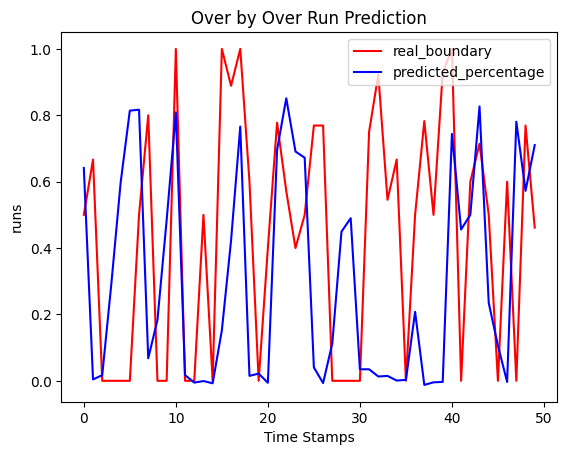

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test_rnn[50:100], color = 'red', label = 'real_boundary')
plt.plot(y_pred[50:100], color = 'blue', label = 'predicted_percentage')
plt.title('Over by Over Run Prediction')
plt.xlabel('Time Stamps')
plt.ylabel('runs')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import numpy as np

# Sample test data (actual values)

# Sample predicted data

# Calculate RMSE


In [ ]:
# Calculate MSE
mse = mean_squared_error(y_test_rnn, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test_rnn, y_pred)

#

In [ ]:
print("MSE is " , mse)
print("MAE is " , mae)

MSE is  0.1777493
MAE is  0.33900017
r_squared is  -0.5650550074120806


## Build ANN

In [ ]:
## Explore the Data Set 

In [ ]:
X_train

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,boundry_percentage,match_num
40,2021-10-24,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,-2.656429,-1.462138,-1.147546,-1.615439,1.207919,-0.512688,-0.811736,-1.328537,1.144447,0.701145,2.259016,1.385228,1.090962,0.957205,1.100510,0.415336,0.422978,0.037018,1.033753,1.211220,0.886166,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,0.544488,0.539166,5.098004,3.474136,2.184417,2.760329,3.556347,2.736870,2.724603,1.572656,2.972571,1.435068,2.811101,1,0.000000,1361
41,2021-10-24,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.786672,-0.935825,-0.821465,-0.868854,1,-1.913804,-1.420502,-0.675948,-1.438054,-0.587267,-0.512688,-0.811736,-0.890992,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,1.351409,1.551970,1.662683,1.955338,1.209288,1.194822,-0.293387,-1.135018,0.188667,0.792971,2.411870,1.168647,0.689359,2.335860,1.511347,1.116379,1.040146,1.159872,0.457639,0.469304,0.062031,1.114192,1.198523,0.967095,0,0.000000,1361
42,2021-10-24,-0.300797,0.987482,-0.795307,-0.752839,-0.496787,-0.701590,-0.519716,-0.706072,-0.754171,1,-1.542492,-1.337229,-0.675948,-1.260670,1.207919,1.164742,-0.811736,-0.015902,1.144447,0.701145,2.259016,1.385228,1.090962,0.957205,1.100510,0.415336,0.422978,0.037018,1.033753,1.211220,0.886166,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,2.245280,0.542886,-0.426284,4.651809,0.582360,3.258277,2.084227,1.964873,1.985798,3.083280,3.392022,0.725432,3.213881,1,0.750000,1361
43,2021-10-24,-0.300797,-0.554081,-0.583366,-0.752839,-0.496787,-0.701590,-0.686160,-0.475285,-0.696829,1,-0.923637,-1.170683,-0.204350,-1.083285,-0.587267,-0.512688,0.455272,-0.234674,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,1.351409,1.551970,1.662683,1.955338,1.209288,1.194822,-0.293387,-1.135018,0.188667,0.792971,2.411870,1.710770,1.959718,-0.426284,-0.451443,-1.019696,-0.830930,-0.757307,-1.196641,-1.163844,-0.945051,-0.902014,-0.368590,-0.966629,0,0.571429,1361
44,2021-10-24,0.586774,2.529046,0.052455,-0.752839,-0.496787,-0.531424,-0.353273,-0.244498,-0.582146,1,-0.707039,-1.024956,-0.204350,-0.905900,-0.587267,1.164742,-0.811736,0.202871,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,1.710770,1.959718,-0.426284,-0.451443,-1.019696,-0.830930,-0.757307,-1.196641,-1.163844,-0.945051,-0.902014,-0.368590,-0.966629,0,0.666667,1361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,-0.300797,-0.554081,1.006188,1.

In [ ]:
X_test

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,boundry_percentage,match_num
798,2022-01-29,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,-2.656429,-1.462138,-1.147546,-1.615439,-0.587267,-0.512688,0.455272,-0.234674,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.044151,1.040893,-0.426284,-0.451443,-1.019696,-0.649858,-0.449189,-0.902547,-0.813884,-0.945051,-0.663141,0.104501,-0.731833,0,0.571429,1456
799,2022-01-29,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.871755,-0.769382,-0.648375,-0.754171,1,-0.057242,-1.316411,-1.147546,-1.438054,1.207919,-0.512688,-0.811736,-1.547310,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.412338,0.400627,0.488425,0.170319,0.562127,0.225767,0.209430,0.098947,0.202063,2.188214,-0.368908,-0.044151,1.040893,-0.426284,-0.451443,-1.019696,-0.649858,-0.449189,-0.902547,-0.813884,-0.945051,-0.663141,0.104501,-0.731833,1,0.000000,1456
800,2022-01-29,-0.300797,-0.554081,-0.265455,-0.752839,-0.496787,-1.041921,-0.436494,-0.879162,-0.696829,1,-1.171179,-1.295593,-0.675948,-1.260670,-0.587267,-0.512688,0.455272,-0.672219,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.099124,-0.125772,-0.426284,-0.647722,-1.019696,-0.468786,-0.620366,-0.792261,-0.697230,-0.945051,-0.567876,-0.309454,-0.550487,0,0.800000,1456
801,2022-01-29,-0.300797,0.987482,-0.901277,-0.227008,-0.496787,-0.871755,-0.103607,-0.879162,-0.410122,1,-1.047408,-1.191502,-0.675948,-1.083285,-0.587267,-0.512688,-0.811736,-1.328537,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.412338,0.400627,0.488425,0.170319,0.562127,0.225767,0.209430,0.098947,0.202063,2.188214,-0.368908,-0.099124,-0.125772,-0.426284,-0.647722,-1.019696,-0.468786,-0.620366,-0.792261,-0.697230,-0.945051,-0.567876,-0.309454,-0.550487,0,0.000000,1456
802,2022-01-29,0.586774,-0.554081,0.264396,-0.752839,-0.496787,0.489571,-0.935825,-0.244498,-0.926195,1,-1.264007,-1.149865,-0.675948,-0.905900,-0.587267,1.164742,1.722280,1.953052,-0.149712,-0.147648,-0.429572,-0.680549,-1.035208,-0.518717,-0.641550,-0.824371,-0.736499,-0.963482,-0.610711,-0.362013,-0.597084,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.076289,0.783752,-0.426284,0.529952,2.184417,1.100504,1.194108,0.714972,0.897033,-0.777204,0.871053,0.252342,0.711302,0,0.823529,1456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
X_train

,date,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,wickets_fallen,sixers,fours,total_runs,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF,y_is_wicket_fallen,boundry_percentage,match_num
40,2021-10-24,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,-2.656429,-1.462138,-1.147546,-1.615439,1.207919,-0.512688,-0.811736,-1.328537,1.144447,0.701145,2.259016,1.385228,1.090962,0.957205,1.100510,0.415336,0.422978,0.037018,1.033753,1.211220,0.886166,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,0.544488,0.539166,5.098004,3.474136,2.184417,2.760329,3.556347,2.736870,2.724603,1.572656,2.972571,1.435068,2.811101,1,0.000000,1361
41,2021-10-24,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.786672,-0.935825,-0.821465,-0.868854,1,-1.913804,-1.420502,-0.675948,-1.438054,-0.587267,-0.512688,-0.811736,-0.890992,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,1.351409,1.551970,1.662683,1.955338,1.209288,1.194822,-0.293387,-1.135018,0.188667,0.792971,2.411870,1.168647,0.689359,2.335860,1.511347,1.116379,1.040146,1.159872,0.457639,0.469304,0.062031,1.114192,1.198523,0.967095,0,0.000000,1361
42,2021-10-24,-0.300797,0.987482,-0.795307,-0.752839,-0.496787,-0.701590,-0.519716,-0.706072,-0.754171,1,-1.542492,-1.337229,-0.675948,-1.260670,1.207919,1.164742,-0.811736,-0.015902,1.144447,0.701145,2.259016,1.385228,1.090962,0.957205,1.100510,0.415336,0.422978,0.037018,1.033753,1.211220,0.886166,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,2.245280,0.542886,-0.426284,4.651809,0.582360,3.258277,2.084227,1.964873,1.985798,3.083280,3.392022,0.725432,3.213881,1,0.750000,1361
43,2021-10-24,-0.300797,-0.554081,-0.583366,-0.752839,-0.496787,-0.701590,-0.686160,-0.475285,-0.696829,1,-0.923637,-1.170683,-0.204350,-1.083285,-0.587267,-0.512688,0.455272,-0.234674,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,1.351409,1.551970,1.662683,1.955338,1.209288,1.194822,-0.293387,-1.135018,0.188667,0.792971,2.411870,1.710770,1.959718,-0.426284,-0.451443,-1.019696,-0.830930,-0.757307,-1.196641,-1.163844,-0.945051,-0.902014,-0.368590,-0.966629,0,0.571429,1361
44,2021-10-24,0.586774,2.529046,0.052455,-0.752839,-0.496787,-0.531424,-0.353273,-0.244498,-0.582146,1,-0.707039,-1.024956,-0.204350,-0.905900,-0.587267,1.164742,-0.811736,0.202871,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,1.710770,1.959718,-0.426284,-0.451443,-1.019696,-0.830930,-0.757307,-1.196641,-1.163844,-0.945051,-0.902014,-0.368590,-0.966629,0,0.666667,1361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,2018-04-03,-0.300797,-0.554081,1.006188,1.

In [ ]:
X_train.columns

Index(['date', 'over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'over_start_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over', 'wickets_fallen', 'sixers',
       'fours', 'total_runs', 'bat_on_str_Ave', 'bat_on_str_SR',
       'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0', 'bat_on_str_4s',
       'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns', 'bat_on_str_NO',
       'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF', 'bowler_Mat',
       'bowler_Inns', 'bowler_Overs', 'bowler_Mdns', 'bowler_Runs',
       'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR', 'bowler_4w',
       'bowler_5w', '

In [ ]:
X_train_ann  = X_train[['over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'over_start_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over','bat_on_str_Ave', 'bat_on_str_SR',
       'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0', 'bat_on_str_4s',
       'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns', 'bat_on_str_NO',
       'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF', 'bowler_Mat',
       'bowler_Inns', 'bowler_Overs', 'bowler_Mdns', 'bowler_Runs',
       'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR', 'bowler_4w',
       'bowler_5w', 'bat_off_str_Ave', 'bat_off_str_SR', 'bat_off_str_100',
       'bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s', 'bat_off_str_6s',
       'bat_off_str_Mat', 'bat_off_str_Inns', 'bat_off_str_NO',
       'bat_off_str_Runs', 'bat_off_str_HS', 'bat_off_str_BF']]

In [ ]:
X_train_ann

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF
40,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,-2.656429,-1.462138,-1.147546,-1.615439,1.144447,0.701145,2.259016,1.385228,1.090962,0.957205,1.100510,0.415336,0.422978,0.037018,1.033753,1.211220,0.886166,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,0.544488,0.539166,5.098004,3.474136,2.184417,2.760329,3.556347,2.736870,2.724603,1.572656,2.972571,1.435068,2.811101
41,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.786672,-0.935825,-0.821465,-0.868854,1,-1.913804,-1.420502,-0.675948,-1.438054,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,1.351409,1.551970,1.662683,1.955338,1.209288,1.194822,-0.293387,-1.135018,0.188667,0.792971,2.411870,1.168647,0.689359,2.335860,1.511347,1.116379,1.040146,1.159872,0.457639,0.469304,0.062031,1.114192,1.198523,0.967095
42,-0.300797,0.987482,-0.795307,-0.752839,-0.496787,-0.701590,-0.519716,-0.706072,-0.754171,1,-1.542492,-1.337229,-0.675948,-1.260670,1.144447,0.701145,2.259016,1.385228,1.090962,0.957205,1.100510,0.415336,0.422978,0.037018,1.033753,1.211220,0.886166,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,2.245280,0.542886,-0.426284,4.651809,0.582360,3.258277,2.084227,1.964873,1.985798,3.083280,3.392022,0.725432,3.213881
43,-0.300797,-0.554081,-0.583366,-0.752839,-0.496787,-0.701590,-0.686160,-0.475285,-0.696829,1,-0.923637,-1.170683,-0.204350,-1.083285,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,1.351409,1.551970,1.662683,1.955338,1.209288,1.194822,-0.293387,-1.135018,0.188667,0.792971,2.411870,1.710770,1.959718,-0.426284,-0.451443,-1.019696,-0.830930,-0.757307,-1.196641,-1.163844,-0.945051,-0.902014,-0.368590,-0.966629
44,0.586774,2.529046,0.052455,-0.752839,-0.496787,-0.531424,-0.353273,-0.244498,-0.582146,1,-0.707039,-1.024956,-0.204350,-0.905900,2.243488,0.548624,-0.429572,4.389995,0.559420,3.126811,2.005041,1.910276,1.930298,3.038515,3.260662,0.717657,3.082123,0.264064,0.400627,0.468206,0.170319,0.590890,0.318058,0.088825,0.301901,-0.012280,-0.602272,-0.368908,1.710770,1.959718,-0.426284,-0.451443,-1.019696,-0.830930,-0.757307,-1.196641,-1.163844,-0.945051,-0.902014,-0.368590,-0.966629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19105,-0.300797,-0.554081,1.006188,1.876315,-0.496787,0.574654,1.893717,0.274772,1.711514,2,0.654441,0.765409,-0.675948,0.513178,2.286655,-0.010621,-0.429572,-0.117155,-1.035208,-0.090700,-0.708553,-0.678523,-0.581902,0.037018,-0.170056,0.810200,-0.145579,0.264064,-0.312110,-0.447871,0.170319,-0.436349,-0.374125,-0.374973,-0.022826,-0.414172,-0.602272,-0.368908,2.190307,0.277376,-0.426284,-0.647722,-1.019696,-0.891287,-0.928484,-1.270165,-1.202728,-0.945051,-0.951780,-0.191181,-0.974264
19106,0.5

In [ ]:
X_test_ann  = X_test[['over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'over_start_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over','bat_on_str_Ave', 'bat_on_str_SR',
       'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0', 'bat_on_str_4s',
       'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns', 'bat_on_str_NO',
       'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF', 'bowler_Mat',
       'bowler_Inns', 'bowler_Overs', 'bowler_Mdns', 'bowler_Runs',
       'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR', 'bowler_4w',
       'bowler_5w', 'bat_off_str_Ave', 'bat_off_str_SR', 'bat_off_str_100',
       'bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s', 'bat_off_str_6s',
       'bat_off_str_Mat', 'bat_off_str_Inns', 'bat_off_str_NO',
       'bat_off_str_Runs', 'bat_off_str_HS', 'bat_off_str_BF']]

In [ ]:
y_train_ann = X_train['boundry_percentage']

In [ ]:
y_test_ann = X_test['boundry_percentage']

In [ ]:
print(X_train_ann.shape)
print(y_train_ann.shape)

print(X_test_ann.shape)

print(y_test_ann.shape)

(10002, 51)
(10002,)
(3752, 51)
(3752,)


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers



# Create the ANN model
model = Sequential()
model.add(Dense(64, input_shape=(51,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))  # Output layer with 1 neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15)

# Train the model with early stopping
model.fit(X_train_ann, y_train_ann, epochs=100, batch_size=32, validation_data=(X_test_ann, y_test_ann), callbacks=[early_stopping])

# Make predictions
predictions = model.predict(X_test_ann)

# Print the predicted values
print(predictions)


Epoch 1/100
313/313 [==============================] - 3s 3ms/step - loss: 0.2003 - val_loss: 0.1254
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 0.1268 - val_loss: 0.1215
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.1229 - val_loss: 0.1182
Epoch 4/100
313/313 [==============================] - 1s 4ms/step - loss: 0.1204 - val_loss: 0.1180
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.1179 - val_loss: 0.1177
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.1166 - val_loss: 0.1176
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.1163 - val_loss: 0.1173
Epoch 8/100
313/313 [==============================] - 1s 3ms/step - loss: 0.1149 - val_loss: 0.1168
Epoch 9/100
313/313 [==============================] - 1s 3ms/step - loss: 0.1142 - val_loss: 0.1175
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 0.1140 - val_lo

In [ ]:
predictions , y_test_ann = np.array(predictions).astype('float32') , np.array(y_test_ann).astype('float32')

In [ ]:
# Calculate MSE
mse = mean_squared_error(y_test_ann, predictions)

# Calculate MAE
mae = mean_absolute_error(y_test_ann, predictions)

# Calculate R-squared
r_squared = r2_score(y_test_ann, predictions)

In [ ]:
print("MSE is " , mse)
print("MAE is " , mae)
print("r_squared is " , r_squared)

MSE is  0.121282235
MAE is  0.3081907
r_squared is  -0.005554347180151131


In [ ]:
predictions.shape

(3752, 1)

In [ ]:
y_test_ann.shape

(3752,)

In [ ]:
print(predictions.shape)
print(y_test_ann.shape)


(3752, 1)
(3752,)


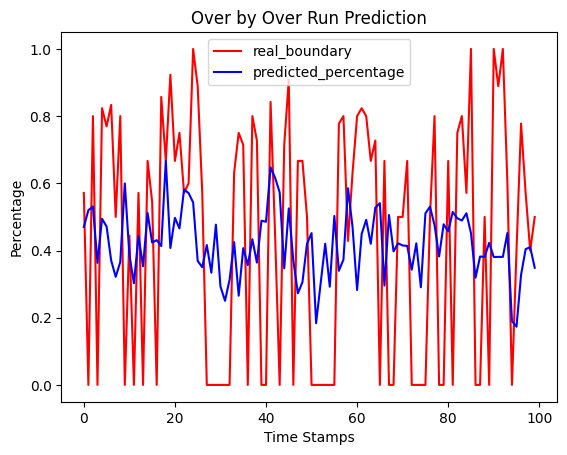

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test_ann[0:100], color = 'red', label = 'real_boundary')
plt.plot(predictions[0:100], color = 'blue', label = 'predicted_percentage')
plt.title('Over by Over Run Prediction')
plt.xlabel('Time Stamps')
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [ ]:
y_test_ann

array([0.5714286, 0.       , 0.8      , ..., 0.       , 0.8      ,
       0.       ], dtype=float32)

In [ ]:
predictions

array([[0.47015268],
       [0.5199843 ],
       [0.53089356],
       ...,
       [0.11038113],
       [0.27749118],
       [0.29048264]], dtype=float32)

In [ ]:
X_test_ann

,over_start_bowler_balls_bowled,over_start_bowler_wickets_taken,over_start_bowler_runs_given,over_start_batsman_on_strike_fours,over_start_batsman_on_strike_sixers,over_start_batsman_off_strike_balls_faced,over_start_batsman_on_strike_balls_faced,over_start_batsman_offstrike_runs,over_start_batsman_onstrike_runs,innings,over_start_run_rate,over_start_total_score,over_start_total_wickets_fallen,over,bat_on_str_Ave,bat_on_str_SR,bat_on_str_100,bat_on_str_50,bat_on_str_0,bat_on_str_4s,bat_on_str_6s,bat_on_str_Mat,bat_on_str_Inns,bat_on_str_NO,bat_on_str_Runs,bat_on_str_HS,bat_on_str_BF,bowler_Mat,bowler_Inns,bowler_Overs,bowler_Mdns,bowler_Runs,bowler_Wkts,bowler_Ave,bowler_Econ,bowler_SR,bowler_4w,bowler_5w,bat_off_str_Ave,bat_off_str_SR,bat_off_str_100,bat_off_str_50,bat_off_str_0,bat_off_str_4s,bat_off_str_6s,bat_off_str_Mat,bat_off_str_Inns,bat_off_str_NO,bat_off_str_Runs,bat_off_str_HS,bat_off_str_BF
798,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-1.041921,-1.102269,-0.879162,-0.926195,1,-2.656429,-1.462138,-1.147546,-1.615439,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.044151,1.040893,-0.426284,-0.451443,-1.019696,-0.649858,-0.449189,-0.902547,-0.813884,-0.945051,-0.663141,0.104501,-0.731833
799,-1.188367,-0.554081,-1.007247,-0.752839,-0.496787,-0.871755,-0.769382,-0.648375,-0.754171,1,-0.057242,-1.316411,-1.147546,-1.438054,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.412338,0.400627,0.488425,0.170319,0.562127,0.225767,0.209430,0.098947,0.202063,2.188214,-0.368908,-0.044151,1.040893,-0.426284,-0.451443,-1.019696,-0.649858,-0.449189,-0.902547,-0.813884,-0.945051,-0.663141,0.104501,-0.731833
800,-0.300797,-0.554081,-0.265455,-0.752839,-0.496787,-1.041921,-0.436494,-0.879162,-0.696829,1,-1.171179,-1.295593,-0.675948,-1.260670,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.099124,-0.125772,-0.426284,-0.647722,-1.019696,-0.468786,-0.620366,-0.792261,-0.697230,-0.945051,-0.567876,-0.309454,-0.550487
801,-0.300797,0.987482,-0.901277,-0.227008,-0.496787,-0.871755,-0.103607,-0.879162,-0.410122,1,-1.047408,-1.191502,-0.675948,-1.083285,-0.126401,0.799437,-0.429572,0.446238,2.154048,1.016242,1.134011,0.670570,0.848120,-0.796732,0.796050,0.224094,0.636159,0.412338,0.400627,0.488425,0.170319,0.562127,0.225767,0.209430,0.098947,0.202063,2.188214,-0.368908,-0.099124,-0.125772,-0.426284,-0.647722,-1.019696,-0.468786,-0.620366,-0.792261,-0.697230,-0.945051,-0.567876,-0.309454,-0.550487
802,0.586774,-0.554081,0.264396,-0.752839,-0.496787,0.489571,-0.935825,-0.244498,-0.926195,1,-1.264007,-1.149865,-0.675948,-0.905900,-0.149712,-0.147648,-0.429572,-0.680549,-1.035208,-0.518717,-0.641550,-0.824371,-0.736499,-0.963482,-0.610711,-0.362013,-0.597084,0.610037,0.729582,0.793265,1.955338,0.845645,0.964095,-0.411332,0.009647,-0.467758,0.792971,-0.368908,-0.076289,0.783752,-0.426284,0.529952,2.184417,1.100504,1.194108,0.714972,0.897033,-0.777204,0.871053,0.252342,0.711302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5912,0.142989,-0.554081,0.582307,-0.752839,-0.496787,-0.446341,-0.852604,-0.590678,-0.696829,2,0.468784,0.640500,1.210445,0.513178,-0.528721,-0.695756,-0.429572,-0.304953,0.027877,-0.282570,-0.675051,-0.095131,-0.002164,-0.463232,-0.245120,-0.146079,-0.108264,-0.971556,-0.970021,-0.934682,-0.722190,-0.826700,-0.835580,0.027636,2.599349,-0.762479,-0.602272,-0.368908,-0.398518,-0.267130,-0.426284,0.137394,4.320492,0.361127,1.262579,1.744302,1.791

LIGHT GBM Model

In [ ]:
X_train_gbm  = X_train[['over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'over_start_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over','bat_on_str_Ave', 'bat_on_str_SR',
       'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0', 'bat_on_str_4s',
       'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns', 'bat_on_str_NO',
       'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF', 'bowler_Mat',
       'bowler_Inns', 'bowler_Overs', 'bowler_Mdns', 'bowler_Runs',
       'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR', 'bowler_4w',
       'bowler_5w', 'bat_off_str_Ave', 'bat_off_str_SR', 'bat_off_str_100',
       'bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s', 'bat_off_str_6s',
       'bat_off_str_Mat', 'bat_off_str_Inns', 'bat_off_str_NO',
       'bat_off_str_Runs', 'bat_off_str_HS', 'bat_off_str_BF']]

In [ ]:
X_test_gbm  = X_test[['over_start_bowler_balls_bowled',
       'over_start_bowler_wickets_taken', 'over_start_bowler_runs_given',
       'over_start_batsman_on_strike_fours',
       'over_start_batsman_on_strike_sixers',
       'over_start_batsman_off_strike_balls_faced',
       'over_start_batsman_on_strike_balls_faced',
       'over_start_batsman_offstrike_runs', 'over_start_batsman_onstrike_runs',
       'innings', 'over_start_run_rate', 'over_start_total_score',
       'over_start_total_wickets_fallen', 'over','bat_on_str_Ave', 'bat_on_str_SR',
       'bat_on_str_100', 'bat_on_str_50', 'bat_on_str_0', 'bat_on_str_4s',
       'bat_on_str_6s', 'bat_on_str_Mat', 'bat_on_str_Inns', 'bat_on_str_NO',
       'bat_on_str_Runs', 'bat_on_str_HS', 'bat_on_str_BF', 'bowler_Mat',
       'bowler_Inns', 'bowler_Overs', 'bowler_Mdns', 'bowler_Runs',
       'bowler_Wkts', 'bowler_Ave', 'bowler_Econ', 'bowler_SR', 'bowler_4w',
       'bowler_5w', 'bat_off_str_Ave', 'bat_off_str_SR', 'bat_off_str_100',
       'bat_off_str_50', 'bat_off_str_0', 'bat_off_str_4s', 'bat_off_str_6s',
       'bat_off_str_Mat', 'bat_off_str_Inns', 'bat_off_str_NO',
       'bat_off_str_Runs', 'bat_off_str_HS', 'bat_off_str_BF']]

In [ ]:
y_train_gbm = X_train['boundry_percentage']

In [ ]:
y_test_gbm = X_test['boundry_percentage']

In [ ]:
%pip install lightgbm

  Using cached lightgbm-3.3.5-py3-none-win_amd64.whl (1.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'learning_rate': 0.005,

}

In [ ]:
%pip install --upgrade lightgbm


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import lightgbm as lgb
import xgboost as xgb


In [ ]:
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
from sklearn.metrics import make_scorer, r2_score

scorer = make_scorer(r2_score)


In [ ]:
# Define the hyperparameter grid for grid search
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [500, 300 , 800],
    'max_depth': [3,5, 10],
    'learning_rate': [0.01],
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3,scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train_gbm, y_train_gbm)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   3.9s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   4.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=500; total time=   3.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   2.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=300; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=800; total time=   6.3s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=800; total time=   6.0s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=800; total time=   5.3s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=500; total time=   9.7s
[CV] END .learning_rate=0.01, max_depth=10, n_estimators=500; total time=   8.9s
[CV] END .learning_rate=0.01, max_depth=10, n_est

In [ ]:
gbm = xgb.XGBRegressor(
    objective='reg:squarederror',  # Use squared error as the objective function for regression
    random_state=42, **best_params
)


In [ ]:
gbm.fit(X_train_gbm, y_train_gbm,
        eval_set=[(X_test_gbm, y_test_gbm)])

[0]	validation_0-rmse:0.35562
[1]	validation_0-rmse:0.35522
[2]	validation_0-rmse:0.35483
[3]	validation_0-rmse:0.35445
[4]	validation_0-rmse:0.35408
[5]	validation_0-rmse:0.35372
[6]	validation_0-rmse:0.35335
[7]	validation_0-rmse:0.35300
[8]	validation_0-rmse:0.35265
[9]	validation_0-rmse:0.35232
[10]	validation_0-rmse:0.35198
[11]	validation_0-rmse:0.35166
[12]	validation_0-rmse:0.35134
[13]	validation_0-rmse:0.35104
[14]	validation_0-rmse:0.35072
[15]	validation_0-rmse:0.35043
[16]	validation_0-rmse:0.35013
[17]	validation_0-rmse:0.34984
[18]	validation_0-rmse:0.34954
[19]	validation_0-rmse:0.34927
[20]	validation_0-rmse:0.34900
[21]	validation_0-rmse:0.34872
[22]	validation_0-rmse:0.34847
[23]	validation_0-rmse:0.34819
[24]	validation_0-rmse:0.34793
[25]	validation_0-rmse:0.34770
[26]	validation_0-rmse:0.34745
[27]	validation_0-rmse:0.34723
[28]	validation_0-rmse:0.34701
[29]	validation_0-rmse:0.34678
[30]	validation_0-rmse:0.34658
[31]	validation_0-rmse:0.34636
[32]	validation_0-

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [ ]:
y_pred = gbm.predict(X_test_gbm)


In [ ]:
from sklearn.metrics import mean_squared_log_error


In [ ]:
print('The rmse of prediction is:', round(mean_squared_log_error(y_pred, y_test_gbm) ** 0.5, 5))


The rmse of prediction is: 0.25023


In [ ]:
y_pred , y_test_gbm = np.array(y_pred).astype('float32') , np.array(y_test_gbm).astype('float32')

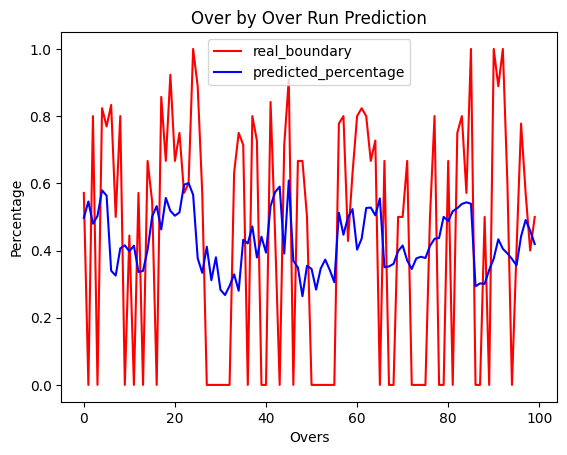

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test_gbm[0:100], color = 'red', label = 'real_boundary')
plt.plot(y_pred[0:100], color = 'blue', label = 'predicted_percentage')
plt.title('Over by Over Run Prediction')
plt.xlabel('Overs')
plt.ylabel('Percentage')
plt.legend()
plt.show()

In [ ]:
# Calculate MSE
mse = mean_squared_error(y_test_gbm, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test_gbm, y_pred)

# Calculate R-squared
r_squared = r2_score(y_test_gbm, y_pred)

In [ ]:
print("mse is " ,mse )
print("mae is " ,mae )
print("r_squared is " ,r_squared )

mse is  0.113865785
mae is  0.3041834
r_squared is  0.055935669615875705
